In [51]:
import pandas as pd
import numpy as np
from scipy import signal, fftpack
import matplotlib.pyplot as plt

df1 = pd.read_csv(r'real.csv')
df2 = pd.read_csv(r'sim.csv')
df3 = (df1+df2)/2

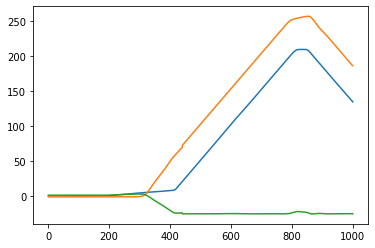

In [52]:
plt.plot(df1.x, df1.y, df2.x, -df2.y, df3.x, df3.y)

-1


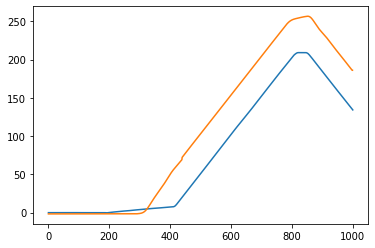

In [54]:
shft01 = np.argmax(signal.correlate(df1.y, -df2.y)) - len(df2.y)
print (shft01)
plt.figure()
plt.plot(df1.x, df1.y,
         df2.x.shift(-shft01), -df2.y)
fig = plt.gcf()

In [55]:
xcor = np.correlate(df1.y, -df2.y, "full")
nR = max(xcor)
maxLag = np.argmax(xcor)  # I imported numpy as np here
print (nR)
print(maxLag)

16088355.91727781
999


In [5]:
print(shift)

-1


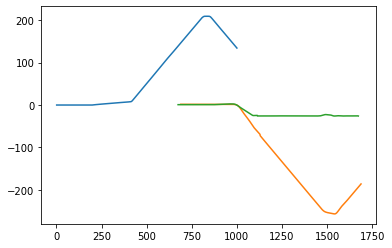

In [48]:
plt.plot(df1.x, df1.y)
for target in [df2, df3]:
    dx = np.mean(np.diff(df1.x.values))
    shift = (np.argmax(signal.correlate(df1.y, target.y)) - (len(target.y)-1)) * dx
    plt.plot(target.x + shift, target.y)

687


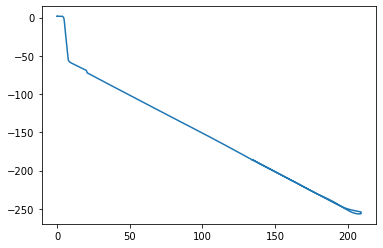

In [8]:
shft01 = np.argmax(signal.correlate(df1, df2)) - len(df1)
print (shft01)
plt.figure()
plt.plot(df1, df2)
fig = plt.gcf()

In [9]:
plt.figure()
plt.plot(df1, df2,
         df1.shift(-shift), df2)
fig = plt.gcf()

TypeError: slice indices must be integers or None or have an __index__ method

<Figure size 432x288 with 0 Axes>

Now we're going to try using a FFT comparison

In [10]:
A = fftpack.fft(df1)
B = fftpack.fft(-df2)
Ar = -A.conjugate()
Br = -B.conjugate()
first = np.argmax(np.abs(fftpack.ifft(Ar*B)))
second = np.argmax(np.abs(fftpack.ifft(A*Br)))
print(first)
print(second)

845
845


Now we'll do it without the FFT

In [11]:
first = np.argmax(signal.correlate(df1,df2))
second = np.argmax(signal.correlate(df2,df1))
print(first)
print(second)

1687
311
